# Your first CNN on CIFAR-10

In this task you will: 
* define your first CNN architecture for CIFAR-10 dataset
* train it from scratch
* visualize learnt filters

CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="images/cifar10.jpg" style="width:80%">

# Import stuff

In [26]:
import sys
sys.path.append("..")
import grading_utils
import download_utils

In [5]:
# !!! remember to clear session/graph if you rebuild your graph to avoid out-of-memory errors !!!

In [9]:
download_utils.link_all_keras_resources()

In [10]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import grading
import keras_utils
from keras_utils import reset_tf_session

Using TensorFlow backend.


1.10.0
2.2.2


# Fill in your Coursera token and email
To successfully submit your answers to our grader, please fill in your Coursera submission token and email

In [11]:
grader = grading.Grader(assignment_key="s1B1I5DuEeeyLAqI7dCYkg", 
                        all_parts=["7W4tu", "nQOsg", "96eco"])

In [40]:
# token expires every 30 min
COURSERA_TOKEN = 'blvcbppkWQUouIXr'
COURSERA_EMAIL = 'arpit.jain2811@gmail.com'

# Load dataset

In [13]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

     8192/170498071 [..............................] - ETA: 22:17

    40960/170498071 [..............................] - ETA: 8:57 

    90112/170498071 [..............................] - ETA: 6:04

   188416/170498071 [..............................] - ETA: 3:51

   319488/170498071 [..............................] - ETA: 2:50

   532480/170498071 [..............................] - ETA: 2:03

   778240/170498071 [..............................] - ETA: 1:37

  1171456/170498071 [..............................] - ETA: 1:14

  1351680/170498071 [..............................] - ETA: 1:13

  1794048/170498071 [..............................] - ETA: 1:01

  2351104/170498071 [..............................] - ETA: 52s 

  3088384/170498071 [..............................] - ETA: 43s

  3563520/170498071 [..............................] - ETA: 41s

  4071424/170498071 [..............................] - ETA: 38s

  4333568/170498071 [..............................] - ETA: 38s

  4415488/170498071 [..............................] - ETA: 40s

  5021696/170498071 [..............................] - ETA: 37s

  5316608/170498071 [..............................] - ETA: 37s

  5595136/170498071 [..............................] - ETA: 36s

  5890048/170498071 [>.............................] - ETA: 36s

  6184960/170498071 [>.............................] - ETA: 36s

  6479872/170498071 [>.............................] - ETA: 36s

  6758400/170498071 [>.............................] - ETA: 36s

  7069696/170498071 [>.............................] - ETA: 36s

  7364608/170498071 [>.............................] - ETA: 36s

  7430144/170498071 [>.............................] - ETA: 38s

  7938048/170498071 [>.............................] - ETA: 37s

  8151040/170498071 [>.............................] - ETA: 37s

  8364032/170498071 [>.............................] - ETA: 37s

  8593408/170498071 [>.............................] - ETA: 37s

  8806400/170498071 [>.............................] - ETA: 37s

  9019392/170498071 [>.............................] - ETA: 38s

  9232384/170498071 [>.............................] - ETA: 38s

  9461760/170498071 [>.............................] - ETA: 38s

  9691136/170498071 [>.............................] - ETA: 38s

  9904128/170498071 [>.............................] - ETA: 38s

 10133504/170498071 [>.............................] - ETA: 38s

 10362880/170498071 [>.............................] - ETA: 38s

 10608640/170498071 [>.............................] - ETA: 39s

 10838016/170498071 [>.............................] - ETA: 39s

 10936320/170498071 [>.............................] - ETA: 39s

 11280384/170498071 [>.............................] - ETA: 39s

 11444224/170498071 [=>............................] - ETA: 39s

 11608064/170498071 [=>............................] - ETA: 39s

 11771904/170498071 [=>............................] - ETA: 40s

 11952128/170498071 [=>............................] - ETA: 40s

 12115968/170498071 [=>............................] - ETA: 40s

 12296192/170498071 [=>............................] - ETA: 40s

 12460032/170498071 [=>............................] - ETA: 41s

 12623872/170498071 [=>............................] - ETA: 41s

 12804096/170498071 [=>............................] - ETA: 41s

 12984320/170498071 [=>............................] - ETA: 41s

 13164544/170498071 [=>............................] - ETA: 42s

 13344768/170498071 [=>............................] - ETA: 42s

 13475840/170498071 [=>............................] - ETA: 42s

 13721600/170498071 [=>............................] - ETA: 42s

 13819904/170498071 [=>............................] - ETA: 42s

 13950976/170498071 [=>............................] - ETA: 43s

 14082048/170498071 [=>............................] - ETA: 43s

 14229504/170498071 [=>............................] - ETA: 43s

 14360576/170498071 [=>............................] - ETA: 44s

 14508032/170498071 [=>............................] - ETA: 44s

 14639104/170498071 [=>............................] - ETA: 44s

 14786560/170498071 [=>............................] - ETA: 44s

 14901248/170498071 [=>............................] - ETA: 44s

 15048704/170498071 [=>............................] - ETA: 45s

 15179776/170498071 [=>............................] - ETA: 45s

 15327232/170498071 [=>............................] - ETA: 45s

 15458304/170498071 [=>............................] - ETA: 45s

 15605760/170498071 [=>............................] - ETA: 45s

 15753216/170498071 [=>............................] - ETA: 46s

 15884288/170498071 [=>............................] - ETA: 46s

 16031744/170498071 [=>............................] - ETA: 46s

 16162816/170498071 [=>............................] - ETA: 46s

 16310272/170498071 [=>............................] - ETA: 46s

 16457728/170498071 [=>............................] - ETA: 46s

 16605184/170498071 [=>............................] - ETA: 47s

 16752640/170498071 [=>............................] - ETA: 47s

 16900096/170498071 [=>............................] - ETA: 47s

 17063936/170498071 [==>...........................] - ETA: 47s

 17211392/170498071 [==>...........................] - ETA: 47s

 17358848/170498071 [==>...........................] - ETA: 47s

 17506304/170498071 [==>...........................] - ETA: 47s

 17670144/170498071 [==>...........................] - ETA: 47s

 17817600/170498071 [==>...........................] - ETA: 48s

 17965056/170498071 [==>...........................] - ETA: 48s

 18128896/170498071 [==>...........................] - ETA: 48s

 18276352/170498071 [==>...........................] - ETA: 48s

 18423808/170498071 [==>...........................] - ETA: 48s

 18587648/170498071 [==>...........................] - ETA: 48s

 18718720/170498071 [==>...........................] - ETA: 48s

 18882560/170498071 [==>...........................] - ETA: 48s

 19030016/170498071 [==>...........................] - ETA: 48s

 19177472/170498071 [==>...........................] - ETA: 48s

 19341312/170498071 [==>...........................] - ETA: 48s

 19488768/170498071 [==>...........................] - ETA: 48s

 19652608/170498071 [==>...........................] - ETA: 49s

 19800064/170498071 [==>...........................] - ETA: 49s

 19947520/170498071 [==>...........................] - ETA: 49s

 20144128/170498071 [==>...........................] - ETA: 49s

 20242432/170498071 [==>...........................] - ETA: 49s

 20340736/170498071 [==>...........................] - ETA: 49s

 20455424/170498071 [==>...........................] - ETA: 49s

 20570112/170498071 [==>...........................] - ETA: 49s

 20684800/170498071 [==>...........................] - ETA: 50s

 20799488/170498071 [==>...........................] - ETA: 50s

 20815872/170498071 [==>...........................] - ETA: 50s

 20946944/170498071 [==>...........................] - ETA: 50s

 21061632/170498071 [==>...........................] - ETA: 51s

 21176320/170498071 [==>...........................] - ETA: 51s

 21307392/170498071 [==>...........................] - ETA: 51s

 21438464/170498071 [==>...........................] - ETA: 51s

 21569536/170498071 [==>...........................] - ETA: 51s

 21700608/170498071 [==>...........................] - ETA: 51s

 21831680/170498071 [==>...........................] - ETA: 51s

 21962752/170498071 [==>...........................] - ETA: 51s

 22093824/170498071 [==>...........................] - ETA: 51s

 22224896/170498071 [==>...........................] - ETA: 51s

 22372352/170498071 [==>...........................] - ETA: 51s

 22503424/170498071 [==>...........................] - ETA: 52s

 22650880/170498071 [==>...........................] - ETA: 52s

 22781952/170498071 [===>..........................] - ETA: 52s

 22929408/170498071 [===>..........................] - ETA: 52s

 23076864/170498071 [===>..........................] - ETA: 52s

 23224320/170498071 [===>..........................] - ETA: 52s

 23355392/170498071 [===>..........................] - ETA: 52s

 23502848/170498071 [===>..........................] - ETA: 52s

 23650304/170498071 [===>..........................] - ETA: 52s

 23797760/170498071 [===>..........................] - ETA: 52s

 23945216/170498071 [===>..........................] - ETA: 52s

 24109056/170498071 [===>..........................] - ETA: 52s

 24256512/170498071 [===>..........................] - ETA: 52s

 24403968/170498071 [===>..........................] - ETA: 52s

 24551424/170498071 [===>..........................] - ETA: 52s

 24715264/170498071 [===>..........................] - ETA: 52s

 24862720/170498071 [===>..........................] - ETA: 52s

 25026560/170498071 [===>..........................] - ETA: 52s

 25174016/170498071 [===>..........................] - ETA: 52s

 25337856/170498071 [===>..........................] - ETA: 52s

 25485312/170498071 [===>..........................] - ETA: 52s

 25632768/170498071 [===>..........................] - ETA: 52s

 25796608/170498071 [===>..........................] - ETA: 52s

 25944064/170498071 [===>..........................] - ETA: 52s

 26107904/170498071 [===>..........................] - ETA: 52s

 26255360/170498071 [===>..........................] - ETA: 52s

 26419200/170498071 [===>..........................] - ETA: 52s

 26583040/170498071 [===>..........................] - ETA: 52s

 26746880/170498071 [===>..........................] - ETA: 52s

 26894336/170498071 [===>..........................] - ETA: 52s

 27058176/170498071 [===>..........................] - ETA: 52s

 27222016/170498071 [===>..........................] - ETA: 52s

 27369472/170498071 [===>..........................] - ETA: 52s

 27516928/170498071 [===>..........................] - ETA: 52s

 27680768/170498071 [===>..........................] - ETA: 52s

 27828224/170498071 [===>..........................] - ETA: 52s

 27926528/170498071 [===>..........................] - ETA: 52s

 28139520/170498071 [===>..........................] - ETA: 52s

 28254208/170498071 [===>..........................] - ETA: 52s

 28368896/170498071 [===>..........................] - ETA: 52s

 28483584/170498071 [====>.........................] - ETA: 52s

 28532736/170498071 [====>.........................] - ETA: 52s

 28696576/170498071 [====>.........................] - ETA: 52s

 28778496/170498071 [====>.........................] - ETA: 52s

 28860416/170498071 [====>.........................] - ETA: 52s

 28942336/170498071 [====>.........................] - ETA: 53s

 29024256/170498071 [====>.........................] - ETA: 53s

 29122560/170498071 [====>.........................] - ETA: 53s

 29220864/170498071 [====>.........................] - ETA: 53s

 29319168/170498071 [====>.........................] - ETA: 53s

 29401088/170498071 [====>.........................] - ETA: 53s

 29499392/170498071 [====>.........................] - ETA: 53s

 29581312/170498071 [====>.........................] - ETA: 53s

 29679616/170498071 [====>.........................] - ETA: 53s

 29777920/170498071 [====>.........................] - ETA: 54s

 29876224/170498071 [====>.........................] - ETA: 54s

 29958144/170498071 [====>.........................] - ETA: 54s

 30056448/170498071 [====>.........................] - ETA: 54s

 30154752/170498071 [====>.........................] - ETA: 54s

 30253056/170498071 [====>.........................] - ETA: 54s

 30334976/170498071 [====>.........................] - ETA: 54s

 30433280/170498071 [====>.........................] - ETA: 54s

 30531584/170498071 [====>.........................] - ETA: 54s

 30629888/170498071 [====>.........................] - ETA: 54s

 30728192/170498071 [====>.........................] - ETA: 55s

 30826496/170498071 [====>.........................] - ETA: 55s

 30924800/170498071 [====>.........................] - ETA: 55s

 31006720/170498071 [====>.........................] - ETA: 55s

 31121408/170498071 [====>.........................] - ETA: 55s

 31203328/170498071 [====>.........................] - ETA: 55s

 31301632/170498071 [====>.........................] - ETA: 55s

 31399936/170498071 [====>.........................] - ETA: 55s

 31481856/170498071 [====>.........................] - ETA: 55s

 31596544/170498071 [====>.........................] - ETA: 55s

 31694848/170498071 [====>.........................] - ETA: 55s

 31809536/170498071 [====>.........................] - ETA: 55s

 31907840/170498071 [====>.........................] - ETA: 55s

 32022528/170498071 [====>.........................] - ETA: 55s

 32120832/170498071 [====>.........................] - ETA: 55s

 32235520/170498071 [====>.........................] - ETA: 56s

 32333824/170498071 [====>.........................] - ETA: 56s

 32432128/170498071 [====>.........................] - ETA: 56s

 32546816/170498071 [====>.........................] - ETA: 56s

 32661504/170498071 [====>.........................] - ETA: 56s

 32776192/170498071 [====>.........................] - ETA: 56s

 32890880/170498071 [====>.........................] - ETA: 56s

 33005568/170498071 [====>.........................] - ETA: 56s

 33120256/170498071 [====>.........................] - ETA: 56s

 33218560/170498071 [====>.........................] - ETA: 56s

 33333248/170498071 [====>.........................] - ETA: 56s

 33464320/170498071 [====>.........................] - ETA: 56s

 33579008/170498071 [====>.........................] - ETA: 56s

 33693696/170498071 [====>.........................] - ETA: 56s

 33808384/170498071 [====>.........................] - ETA: 56s

 33939456/170498071 [====>.........................] - ETA: 56s

 34054144/170498071 [====>.........................] - ETA: 56s

 34168832/170498071 [=====>........................] - ETA: 56s

 34299904/170498071 [=====>........................] - ETA: 56s

 34414592/170498071 [=====>........................] - ETA: 56s

 34529280/170498071 [=====>........................] - ETA: 56s

 34643968/170498071 [=====>........................] - ETA: 56s

 34775040/170498071 [=====>........................] - ETA: 56s

 34906112/170498071 [=====>........................] - ETA: 56s

 35020800/170498071 [=====>........................] - ETA: 56s

 35151872/170498071 [=====>........................] - ETA: 56s

 35266560/170498071 [=====>........................] - ETA: 56s

 35397632/170498071 [=====>........................] - ETA: 56s

 35528704/170498071 [=====>........................] - ETA: 56s

 35643392/170498071 [=====>........................] - ETA: 56s

 35774464/170498071 [=====>........................] - ETA: 56s

 35905536/170498071 [=====>........................] - ETA: 56s

 36036608/170498071 [=====>........................] - ETA: 56s

 36151296/170498071 [=====>........................] - ETA: 56s

 36298752/170498071 [=====>........................] - ETA: 56s

 36380672/170498071 [=====>........................] - ETA: 56s

 36478976/170498071 [=====>........................] - ETA: 56s

 36577280/170498071 [=====>........................] - ETA: 56s

 36675584/170498071 [=====>........................] - ETA: 56s

 36773888/170498071 [=====>........................] - ETA: 56s

 36888576/170498071 [=====>........................] - ETA: 56s

 36986880/170498071 [=====>........................] - ETA: 56s

 37085184/170498071 [=====>........................] - ETA: 56s

 37199872/170498071 [=====>........................] - ETA: 56s

 37298176/170498071 [=====>........................] - ETA: 56s

 37412864/170498071 [=====>........................] - ETA: 56s

 37527552/170498071 [=====>........................] - ETA: 57s

 37625856/170498071 [=====>........................] - ETA: 57s

 37740544/170498071 [=====>........................] - ETA: 57s

 37855232/170498071 [=====>........................] - ETA: 57s

 37969920/170498071 [=====>........................] - ETA: 57s

 38084608/170498071 [=====>........................] - ETA: 57s

 38199296/170498071 [=====>........................] - ETA: 57s

 38313984/170498071 [=====>........................] - ETA: 57s

 38445056/170498071 [=====>........................] - ETA: 57s

 38559744/170498071 [=====>........................] - ETA: 57s

 38674432/170498071 [=====>........................] - ETA: 57s

 38805504/170498071 [=====>........................] - ETA: 57s

 38920192/170498071 [=====>........................] - ETA: 57s

 39051264/170498071 [=====>........................] - ETA: 56s

 39165952/170498071 [=====>........................] - ETA: 56s

 39297024/170498071 [=====>........................] - ETA: 56s

 39411712/170498071 [=====>........................] - ETA: 56s

 39542784/170498071 [=====>........................] - ETA: 56s

 39673856/170498071 [=====>........................] - ETA: 56s

 39788544/170498071 [======>.......................] - ETA: 56s

 39870464/170498071 [======>.......................] - ETA: 56s

 39985152/170498071 [======>.......................] - ETA: 56s

 40099840/170498071 [======>.......................] - ETA: 56s

 40198144/170498071 [======>.......................] - ETA: 56s

 40312832/170498071 [======>.......................] - ETA: 56s

 40443904/170498071 [======>.......................] - ETA: 56s

 40574976/170498071 [======>.......................] - ETA: 56s

 40706048/170498071 [======>.......................] - ETA: 56s

 40837120/170498071 [======>.......................] - ETA: 56s

 40968192/170498071 [======>.......................] - ETA: 56s

 41099264/170498071 [======>.......................] - ETA: 56s

 41197568/170498071 [======>.......................] - ETA: 56s

 41295872/170498071 [======>.......................] - ETA: 56s

 41410560/170498071 [======>.......................] - ETA: 56s

 41541632/170498071 [======>.......................] - ETA: 56s

 41639936/170498071 [======>.......................] - ETA: 56s

 41754624/170498071 [======>.......................] - ETA: 56s

 41885696/170498071 [======>.......................] - ETA: 56s

 42000384/170498071 [======>.......................] - ETA: 56s

 42115072/170498071 [======>.......................] - ETA: 56s

 42213376/170498071 [======>.......................] - ETA: 56s

 42328064/170498071 [======>.......................] - ETA: 56s

 42426368/170498071 [======>.......................] - ETA: 56s

 42524672/170498071 [======>.......................] - ETA: 56s

 42639360/170498071 [======>.......................] - ETA: 56s

 42770432/170498071 [======>.......................] - ETA: 56s

 42901504/170498071 [======>.......................] - ETA: 56s

 43016192/170498071 [======>.......................] - ETA: 56s

 43163648/170498071 [======>.......................] - ETA: 56s

 43294720/170498071 [======>.......................] - ETA: 56s

 43425792/170498071 [======>.......................] - ETA: 56s

 43556864/170498071 [======>.......................] - ETA: 55s

 43687936/170498071 [======>.......................] - ETA: 55s

 43819008/170498071 [======>.......................] - ETA: 55s

 43950080/170498071 [======>.......................] - ETA: 55s

 44081152/170498071 [======>.......................] - ETA: 55s

 44195840/170498071 [======>.......................] - ETA: 55s

 44310528/170498071 [======>.......................] - ETA: 55s

 44441600/170498071 [======>.......................] - ETA: 55s

 44507136/170498071 [======>.......................] - ETA: 55s

 44654592/170498071 [======>.......................] - ETA: 55s

 44802048/170498071 [======>.......................] - ETA: 55s

 44933120/170498071 [======>.......................] - ETA: 55s

 45080576/170498071 [======>.......................] - ETA: 55s

 45228032/170498071 [======>.......................] - ETA: 55s

 45375488/170498071 [======>.......................] - ETA: 55s

 45506560/170498071 [=======>......................] - ETA: 55s

 45654016/170498071 [=======>......................] - ETA: 55s

 45801472/170498071 [=======>......................] - ETA: 55s

 45932544/170498071 [=======>......................] - ETA: 55s

 46096384/170498071 [=======>......................] - ETA: 55s

 46243840/170498071 [=======>......................] - ETA: 54s

 46391296/170498071 [=======>......................] - ETA: 54s

 46538752/170498071 [=======>......................] - ETA: 54s

 46702592/170498071 [=======>......................] - ETA: 54s

 46850048/170498071 [=======>......................] - ETA: 54s

 46997504/170498071 [=======>......................] - ETA: 54s

 47144960/170498071 [=======>......................] - ETA: 54s

 47292416/170498071 [=======>......................] - ETA: 54s

 47456256/170498071 [=======>......................] - ETA: 54s

 47603712/170498071 [=======>......................] - ETA: 54s

 47751168/170498071 [=======>......................] - ETA: 54s

 47915008/170498071 [=======>......................] - ETA: 54s

 48062464/170498071 [=======>......................] - ETA: 54s

 48226304/170498071 [=======>......................] - ETA: 54s

 48373760/170498071 [=======>......................] - ETA: 53s

 48537600/170498071 [=======>......................] - ETA: 53s

 48701440/170498071 [=======>......................] - ETA: 53s

 48865280/170498071 [=======>......................] - ETA: 53s

 49029120/170498071 [=======>......................] - ETA: 53s

 49192960/170498071 [=======>......................] - ETA: 53s

 49356800/170498071 [=======>......................] - ETA: 53s

 49520640/170498071 [=======>......................] - ETA: 53s

 49684480/170498071 [=======>......................] - ETA: 53s

 49848320/170498071 [=======>......................] - ETA: 53s

 50012160/170498071 [=======>......................] - ETA: 53s

 50176000/170498071 [=======>......................] - ETA: 52s

 50339840/170498071 [=======>......................] - ETA: 52s

 50520064/170498071 [=======>......................] - ETA: 52s

 50683904/170498071 [=======>......................] - ETA: 52s

 50847744/170498071 [=======>......................] - ETA: 52s

 51011584/170498071 [=======>......................] - ETA: 52s

 51175424/170498071 [========>.....................] - ETA: 52s

 51355648/170498071 [========>.....................] - ETA: 52s

 51535872/170498071 [========>.....................] - ETA: 52s

 51699712/170498071 [========>.....................] - ETA: 52s

 51879936/170498071 [========>.....................] - ETA: 52s

 52060160/170498071 [========>.....................] - ETA: 51s

 52224000/170498071 [========>.....................] - ETA: 51s

 52404224/170498071 [========>.....................] - ETA: 51s

 52584448/170498071 [========>.....................] - ETA: 51s

 52764672/170498071 [========>.....................] - ETA: 51s

 52928512/170498071 [========>.....................] - ETA: 51s

 53108736/170498071 [========>.....................] - ETA: 51s

 53288960/170498071 [========>.....................] - ETA: 51s

 53469184/170498071 [========>.....................] - ETA: 51s

 53649408/170498071 [========>.....................] - ETA: 50s

 53829632/170498071 [========>.....................] - ETA: 50s

 54009856/170498071 [========>.....................] - ETA: 50s

 54190080/170498071 [========>.....................] - ETA: 50s

 54386688/170498071 [========>.....................] - ETA: 50s

 54566912/170498071 [========>.....................] - ETA: 50s

 54747136/170498071 [========>.....................] - ETA: 50s

 54927360/170498071 [========>.....................] - ETA: 50s

 55107584/170498071 [========>.....................] - ETA: 50s

 55336960/170498071 [========>.....................] - ETA: 49s

 55484416/170498071 [========>.....................] - ETA: 49s

 55681024/170498071 [========>.....................] - ETA: 49s

 55877632/170498071 [========>.....................] - ETA: 49s

 56057856/170498071 [========>.....................] - ETA: 49s

 56254464/170498071 [========>.....................] - ETA: 49s

 56451072/170498071 [========>.....................] - ETA: 49s

 56647680/170498071 [========>.....................] - ETA: 49s

 56860672/170498071 [=========>....................] - ETA: 48s

 57057280/170498071 [=========>....................] - ETA: 48s

 57270272/170498071 [=========>....................] - ETA: 48s

 57483264/170498071 [=========>....................] - ETA: 48s

 57696256/170498071 [=========>....................] - ETA: 48s

 57892864/170498071 [=========>....................] - ETA: 48s

 58056704/170498071 [=========>....................] - ETA: 48s

 58269696/170498071 [=========>....................] - ETA: 48s

 58499072/170498071 [=========>....................] - ETA: 47s

 58712064/170498071 [=========>....................] - ETA: 47s

 58875904/170498071 [=========>....................] - ETA: 47s

 59072512/170498071 [=========>....................] - ETA: 47s

 59318272/170498071 [=========>....................] - ETA: 47s

 59547648/170498071 [=========>....................] - ETA: 47s

 59711488/170498071 [=========>....................] - ETA: 47s

 60104704/170498071 [=========>....................] - ETA: 46s

 60252160/170498071 [=========>....................] - ETA: 46s

 60399616/170498071 [=========>....................] - ETA: 46s

 60448768/170498071 [=========>....................] - ETA: 46s

 60727296/170498071 [=========>....................] - ETA: 46s

 60841984/170498071 [=========>....................] - ETA: 46s

 60973056/170498071 [=========>....................] - ETA: 46s

 61104128/170498071 [=========>....................] - ETA: 46s

 61186048/170498071 [=========>....................] - ETA: 46s

 61317120/170498071 [=========>....................] - ETA: 46s

 61431808/170498071 [=========>....................] - ETA: 46s

 61562880/170498071 [=========>....................] - ETA: 46s

 61693952/170498071 [=========>....................] - ETA: 46s

 61808640/170498071 [=========>....................] - ETA: 46s

 61923328/170498071 [=========>....................] - ETA: 46s

 62038016/170498071 [=========>....................] - ETA: 45s

 62169088/170498071 [=========>....................] - ETA: 45s

 62283776/170498071 [=========>....................] - ETA: 45s

 62382080/170498071 [=========>....................] - ETA: 45s

 62513152/170498071 [=========>....................] - ETA: 45s

 62644224/170498071 [==========>...................] - ETA: 45s

 62758912/170498071 [==========>...................] - ETA: 45s

 62889984/170498071 [==========>...................] - ETA: 45s

 63021056/170498071 [==========>...................] - ETA: 45s

 63152128/170498071 [==========>...................] - ETA: 45s

 63234048/170498071 [==========>...................] - ETA: 45s

 63381504/170498071 [==========>...................] - ETA: 45s

 63528960/170498071 [==========>...................] - ETA: 45s

 63676416/170498071 [==========>...................] - ETA: 45s

 63823872/170498071 [==========>...................] - ETA: 45s

 63971328/170498071 [==========>...................] - ETA: 45s

 64118784/170498071 [==========>...................] - ETA: 45s

 64266240/170498071 [==========>...................] - ETA: 45s

 64413696/170498071 [==========>...................] - ETA: 45s

 64561152/170498071 [==========>...................] - ETA: 45s

 64708608/170498071 [==========>...................] - ETA: 44s

 64823296/170498071 [==========>...................] - ETA: 44s

 64954368/170498071 [==========>...................] - ETA: 44s

 65101824/170498071 [==========>...................] - ETA: 44s

 65249280/170498071 [==========>...................] - ETA: 44s

 65396736/170498071 [==========>...................] - ETA: 44s

 65544192/170498071 [==========>...................] - ETA: 44s

 65691648/170498071 [==========>...................] - ETA: 44s

 65839104/170498071 [==========>...................] - ETA: 44s

 65986560/170498071 [==========>...................] - ETA: 44s

 66084864/170498071 [==========>...................] - ETA: 44s

 66215936/170498071 [==========>...................] - ETA: 44s

 66330624/170498071 [==========>...................] - ETA: 44s

 66461696/170498071 [==========>...................] - ETA: 44s

 66576384/170498071 [==========>...................] - ETA: 44s

 66707456/170498071 [==========>...................] - ETA: 44s

 66854912/170498071 [==========>...................] - ETA: 44s

 67002368/170498071 [==========>...................] - ETA: 43s

 67149824/170498071 [==========>...................] - ETA: 43s

 67256320/170498071 [==========>...................] - ETA: 43s

 67379200/170498071 [==========>...................] - ETA: 43s

 67543040/170498071 [==========>...................] - ETA: 43s

 67706880/170498071 [==========>...................] - ETA: 43s

 67870720/170498071 [==========>...................] - ETA: 43s

 68034560/170498071 [==========>...................] - ETA: 43s

 68182016/170498071 [==========>...................] - ETA: 43s

 68313088/170498071 [===========>..................] - ETA: 43s

 68476928/170498071 [===========>..................] - ETA: 43s

 68640768/170498071 [===========>..................] - ETA: 43s

 68804608/170498071 [===========>..................] - ETA: 43s

 68968448/170498071 [===========>..................] - ETA: 43s

 69148672/170498071 [===========>..................] - ETA: 43s

 69296128/170498071 [===========>..................] - ETA: 42s

 69476352/170498071 [===========>..................] - ETA: 42s

 69640192/170498071 [===========>..................] - ETA: 42s

 69820416/170498071 [===========>..................] - ETA: 42s

 69984256/170498071 [===========>..................] - ETA: 42s

 70164480/170498071 [===========>..................] - ETA: 42s

 70328320/170498071 [===========>..................] - ETA: 42s

 70492160/170498071 [===========>..................] - ETA: 42s

 70623232/170498071 [===========>..................] - ETA: 42s

 70770688/170498071 [===========>..................] - ETA: 42s

 70934528/170498071 [===========>..................] - ETA: 42s

 71049216/170498071 [===========>..................] - ETA: 42s

 71196672/170498071 [===========>..................] - ETA: 41s

 71327744/170498071 [===========>..................] - ETA: 41s

 71507968/170498071 [===========>..................] - ETA: 41s

 71671808/170498071 [===========>..................] - ETA: 41s

 71852032/170498071 [===========>..................] - ETA: 41s

 71966720/170498071 [===========>..................] - ETA: 41s

 72097792/170498071 [===========>..................] - ETA: 41s

 72261632/170498071 [===========>..................] - ETA: 41s

 72392704/170498071 [===========>..................] - ETA: 41s

 72572928/170498071 [===========>..................] - ETA: 41s

 72753152/170498071 [===========>..................] - ETA: 41s

 72851456/170498071 [===========>..................] - ETA: 41s

 73031680/170498071 [===========>..................] - ETA: 41s

 73211904/170498071 [===========>..................] - ETA: 40s

 73408512/170498071 [===========>..................] - ETA: 40s

 73588736/170498071 [===========>..................] - ETA: 40s

 73785344/170498071 [===========>..................] - ETA: 40s

 73965568/170498071 [============>.................] - ETA: 40s

 74162176/170498071 [============>.................] - ETA: 40s

 74342400/170498071 [============>.................] - ETA: 40s

 74522624/170498071 [============>.................] - ETA: 40s

 74702848/170498071 [============>.................] - ETA: 40s

 74833920/170498071 [============>.................] - ETA: 40s

 75014144/170498071 [============>.................] - ETA: 40s

 75177984/170498071 [============>.................] - ETA: 39s

 75276288/170498071 [============>.................] - ETA: 39s

 75456512/170498071 [============>.................] - ETA: 39s

 75620352/170498071 [============>.................] - ETA: 39s

 75784192/170498071 [============>.................] - ETA: 39s

 75898880/170498071 [============>.................] - ETA: 39s

 76062720/170498071 [============>.................] - ETA: 39s

 76259328/170498071 [============>.................] - ETA: 39s

 76455936/170498071 [============>.................] - ETA: 39s

 76652544/170498071 [============>.................] - ETA: 39s

 76857344/170498071 [============>.................] - ETA: 39s

 77012992/170498071 [============>.................] - ETA: 39s

 77160448/170498071 [============>.................] - ETA: 38s

 77291520/170498071 [============>.................] - ETA: 38s

 77471744/170498071 [============>.................] - ETA: 38s

 77635584/170498071 [============>.................] - ETA: 38s

 77832192/170498071 [============>.................] - ETA: 38s

 77996032/170498071 [============>.................] - ETA: 38s

 78159872/170498071 [============>.................] - ETA: 38s

 78323712/170498071 [============>.................] - ETA: 38s

 78487552/170498071 [============>.................] - ETA: 38s

 78667776/170498071 [============>.................] - ETA: 38s

 78815232/170498071 [============>.................] - ETA: 38s

 78979072/170498071 [============>.................] - ETA: 37s

 79159296/170498071 [============>.................] - ETA: 37s

 79339520/170498071 [============>.................] - ETA: 37s

 79519744/170498071 [============>.................] - ETA: 37s

 79699968/170498071 [=============>................] - ETA: 37s

 79863808/170498071 [=============>................] - ETA: 37s

 80060416/170498071 [=============>................] - ETA: 37s

 80224256/170498071 [=============>................] - ETA: 37s

 80420864/170498071 [=============>................] - ETA: 37s

 80584704/170498071 [=============>................] - ETA: 37s

 80781312/170498071 [=============>................] - ETA: 37s

 80945152/170498071 [=============>................] - ETA: 36s

 81125376/170498071 [=============>................] - ETA: 36s

 81289216/170498071 [=============>................] - ETA: 36s

 81453056/170498071 [=============>................] - ETA: 36s

 81649664/170498071 [=============>................] - ETA: 36s

 81862656/170498071 [=============>................] - ETA: 36s

 82059264/170498071 [=============>................] - ETA: 36s

 82223104/170498071 [=============>................] - ETA: 36s

 82436096/170498071 [=============>................] - ETA: 36s

 82632704/170498071 [=============>................] - ETA: 36s

 82796544/170498071 [=============>................] - ETA: 35s

 82976768/170498071 [=============>................] - ETA: 35s

 83140608/170498071 [=============>................] - ETA: 35s

 83353600/170498071 [=============>................] - ETA: 35s

 83582976/170498071 [=============>................] - ETA: 35s

 83795968/170498071 [=============>................] - ETA: 35s

 84008960/170498071 [=============>................] - ETA: 35s

 84107264/170498071 [=============>................] - ETA: 35s

 84320256/170498071 [=============>................] - ETA: 35s

 84549632/170498071 [=============>................] - ETA: 35s

 84779008/170498071 [=============>................] - ETA: 34s

 85008384/170498071 [=============>................] - ETA: 34s

 85254144/170498071 [==============>...............] - ETA: 34s

 85499904/170498071 [==============>...............] - ETA: 34s

 85745664/170498071 [==============>...............] - ETA: 34s

 85991424/170498071 [==============>...............] - ETA: 34s

 86237184/170498071 [==============>...............] - ETA: 34s

 86482944/170498071 [==============>...............] - ETA: 34s

 86745088/170498071 [==============>...............] - ETA: 33s

 87007232/170498071 [==============>...............] - ETA: 33s

 87285760/170498071 [==============>...............] - ETA: 33s

 87547904/170498071 [==============>...............] - ETA: 33s

 87826432/170498071 [==============>...............] - ETA: 33s

 88104960/170498071 [==============>...............] - ETA: 33s

 88383488/170498071 [==============>...............] - ETA: 32s

 88678400/170498071 [==============>...............] - ETA: 32s

 88973312/170498071 [==============>...............] - ETA: 32s

 89268224/170498071 [==============>...............] - ETA: 32s

 89563136/170498071 [==============>...............] - ETA: 32s

 89874432/170498071 [==============>...............] - ETA: 32s

 90185728/170498071 [==============>...............] - ETA: 31s

 90497024/170498071 [==============>...............] - ETA: 31s

 90824704/170498071 [==============>...............] - ETA: 31s

 91152384/170498071 [===============>..............] - ETA: 31s

 91480064/170498071 [===============>..............] - ETA: 31s

 91807744/170498071 [===============>..............] - ETA: 31s

 92151808/170498071 [===============>..............] - ETA: 30s

 92495872/170498071 [===============>..............] - ETA: 30s

 92839936/170498071 [===============>..............] - ETA: 30s

 93200384/170498071 [===============>..............] - ETA: 30s

 93577216/170498071 [===============>..............] - ETA: 29s

 93872128/170498071 [===============>..............] - ETA: 29s

 94076928/170498071 [===============>..............] - ETA: 29s

 94363648/170498071 [===============>..............] - ETA: 29s

 94740480/170498071 [===============>..............] - ETA: 29s

 95133696/170498071 [===============>..............] - ETA: 29s

 95526912/170498071 [===============>..............] - ETA: 28s

 95920128/170498071 [===============>..............] - ETA: 28s

 96313344/170498071 [===============>..............] - ETA: 28s

 96706560/170498071 [================>.............] - ETA: 28s

 96935936/170498071 [================>.............] - ETA: 28s

 97247232/170498071 [================>.............] - ETA: 27s

 97591296/170498071 [================>.............] - ETA: 27s

 98033664/170498071 [================>.............] - ETA: 27s

 98476032/170498071 [================>.............] - ETA: 27s

 98770944/170498071 [================>.............] - ETA: 27s

 99115008/170498071 [================>.............] - ETA: 26s

 99475456/170498071 [================>.............] - ETA: 26s

 99573760/170498071 [================>.............] - ETA: 26s

100229120/170498071 [================>.............] - ETA: 26s

100507648/170498071 [================>.............] - ETA: 26s

100786176/170498071 [================>.............] - ETA: 26s

101048320/170498071 [================>.............] - ETA: 25s

101294080/170498071 [================>.............] - ETA: 25s

101539840/170498071 [================>.............] - ETA: 25s

101834752/170498071 [================>.............] - ETA: 25s

102178816/170498071 [================>.............] - ETA: 25s

102539264/170498071 [=================>............] - ETA: 25s

102883328/170498071 [=================>............] - ETA: 25s

103243776/170498071 [=================>............] - ETA: 24s

103604224/170498071 [=================>............] - ETA: 24s

103964672/170498071 [=================>............] - ETA: 24s

104259584/170498071 [=================>............] - ETA: 24s

104554496/170498071 [=================>............] - ETA: 24s

104767488/170498071 [=================>............] - ETA: 24s

105111552/170498071 [=================>............] - ETA: 23s

105472000/170498071 [=================>............] - ETA: 23s

105783296/170498071 [=================>............] - ETA: 23s

106061824/170498071 [=================>............] - ETA: 23s

106192896/170498071 [=================>............] - ETA: 23s

106799104/170498071 [=================>............] - ETA: 23s

106979328/170498071 [=================>............] - ETA: 23s

107225088/170498071 [=================>............] - ETA: 22s

107487232/170498071 [=================>............] - ETA: 22s

107732992/170498071 [=================>............] - ETA: 22s

107945984/170498071 [=================>............] - ETA: 22s

108142592/170498071 [==================>...........] - ETA: 22s

108355584/170498071 [==================>...........] - ETA: 22s

108634112/170498071 [==================>...........] - ETA: 22s

108929024/170498071 [==================>...........] - ETA: 22s

109223936/170498071 [==================>...........] - ETA: 22s

109518848/170498071 [==================>...........] - ETA: 21s

109797376/170498071 [==================>...........] - ETA: 21s

110075904/170498071 [==================>...........] - ETA: 21s

110288896/170498071 [==================>...........] - ETA: 21s

110551040/170498071 [==================>...........] - ETA: 21s

110780416/170498071 [==================>...........] - ETA: 21s

110993408/170498071 [==================>...........] - ETA: 21s

111304704/170498071 [==================>...........] - ETA: 21s

111599616/170498071 [==================>...........] - ETA: 21s

111763456/170498071 [==================>...........] - ETA: 20s

112009216/170498071 [==================>...........] - ETA: 20s

112320512/170498071 [==================>...........] - ETA: 20s

112631808/170498071 [==================>...........] - ETA: 20s

112926720/170498071 [==================>...........] - ETA: 20s

113401856/170498071 [==================>...........] - ETA: 20s

113532928/170498071 [==================>...........] - ETA: 20s

113713152/170498071 [===================>..........] - ETA: 20s

113926144/170498071 [===================>..........] - ETA: 20s

114155520/170498071 [===================>..........] - ETA: 19s

114384896/170498071 [===================>..........] - ETA: 19s

114630656/170498071 [===================>..........] - ETA: 19s

114843648/170498071 [===================>..........] - ETA: 19s

115089408/170498071 [===================>..........] - ETA: 19s

115318784/170498071 [===================>..........] - ETA: 19s

115548160/170498071 [===================>..........] - ETA: 19s

115793920/170498071 [===================>..........] - ETA: 19s

116023296/170498071 [===================>..........] - ETA: 19s

116269056/170498071 [===================>..........] - ETA: 19s

116514816/170498071 [===================>..........] - ETA: 19s

116760576/170498071 [===================>..........] - ETA: 18s

117006336/170498071 [===================>..........] - ETA: 18s

117252096/170498071 [===================>..........] - ETA: 18s

117497856/170498071 [===================>..........] - ETA: 18s

117743616/170498071 [===================>..........] - ETA: 18s

117989376/170498071 [===================>..........] - ETA: 18s

118218752/170498071 [===================>..........] - ETA: 18s

118464512/170498071 [===================>..........] - ETA: 18s

118808576/170498071 [===================>..........] - ETA: 18s

118956032/170498071 [===================>..........] - ETA: 18s

119119872/170498071 [===================>..........] - ETA: 18s

119267328/170498071 [===================>..........] - ETA: 18s

119447552/170498071 [====================>.........] - ETA: 17s

119644160/170498071 [====================>.........] - ETA: 17s

119824384/170498071 [====================>.........] - ETA: 17s

120020992/170498071 [====================>.........] - ETA: 17s

120201216/170498071 [====================>.........] - ETA: 17s

120397824/170498071 [====================>.........] - ETA: 17s

120578048/170498071 [====================>.........] - ETA: 17s

120627200/170498071 [====================>.........] - ETA: 17s

120938496/170498071 [====================>.........] - ETA: 17s

121069568/170498071 [====================>.........] - ETA: 17s

121217024/170498071 [====================>.........] - ETA: 17s

121348096/170498071 [====================>.........] - ETA: 17s

121479168/170498071 [====================>.........] - ETA: 17s

121593856/170498071 [====================>.........] - ETA: 17s

121692160/170498071 [====================>.........] - ETA: 17s

121806848/170498071 [====================>.........] - ETA: 17s

121937920/170498071 [====================>.........] - ETA: 17s

122068992/170498071 [====================>.........] - ETA: 17s

122200064/170498071 [====================>.........] - ETA: 17s

122314752/170498071 [====================>.........] - ETA: 16s

122413056/170498071 [====================>.........] - ETA: 16s

122544128/170498071 [====================>.........] - ETA: 16s

122675200/170498071 [====================>.........] - ETA: 16s

122822656/170498071 [====================>.........] - ETA: 16s

122953728/170498071 [====================>.........] - ETA: 16s

123052032/170498071 [====================>.........] - ETA: 16s

123166720/170498071 [====================>.........] - ETA: 16s

123297792/170498071 [====================>.........] - ETA: 16s

123445248/170498071 [====================>.........] - ETA: 16s

123592704/170498071 [====================>.........] - ETA: 16s

123756544/170498071 [====================>.........] - ETA: 16s

123920384/170498071 [====================>.........] - ETA: 16s

124067840/170498071 [====================>.........] - ETA: 16s

124231680/170498071 [====================>.........] - ETA: 16s

124379136/170498071 [====================>.........] - ETA: 16s

124542976/170498071 [====================>.........] - ETA: 16s

124706816/170498071 [====================>.........] - ETA: 16s

124854272/170498071 [====================>.........] - ETA: 16s

125001728/170498071 [====================>.........] - ETA: 16s

125116416/170498071 [=====================>........] - ETA: 16s

125247488/170498071 [=====================>........] - ETA: 16s

125378560/170498071 [=====================>........] - ETA: 15s

125542400/170498071 [=====================>........] - ETA: 15s

125689856/170498071 [=====================>........] - ETA: 15s

125837312/170498071 [=====================>........] - ETA: 15s

125984768/170498071 [=====================>........] - ETA: 15s

126083072/170498071 [=====================>........] - ETA: 15s

126197760/170498071 [=====================>........] - ETA: 15s

126361600/170498071 [=====================>........] - ETA: 15s

126509056/170498071 [=====================>........] - ETA: 15s

126672896/170498071 [=====================>........] - ETA: 15s

126836736/170498071 [=====================>........] - ETA: 15s

127000576/170498071 [=====================>........] - ETA: 15s

127164416/170498071 [=====================>........] - ETA: 15s

127328256/170498071 [=====================>........] - ETA: 15s

127492096/170498071 [=====================>........] - ETA: 15s

127672320/170498071 [=====================>........] - ETA: 15s

127819776/170498071 [=====================>........] - ETA: 15s

127983616/170498071 [=====================>........] - ETA: 15s

128163840/170498071 [=====================>........] - ETA: 15s

128327680/170498071 [=====================>........] - ETA: 14s

128491520/170498071 [=====================>........] - ETA: 14s

128655360/170498071 [=====================>........] - ETA: 14s

128835584/170498071 [=====================>........] - ETA: 14s

128999424/170498071 [=====================>........] - ETA: 14s

129179648/170498071 [=====================>........] - ETA: 14s

129359872/170498071 [=====================>........] - ETA: 14s

129523712/170498071 [=====================>........] - ETA: 14s

129703936/170498071 [=====================>........] - ETA: 14s

129884160/170498071 [=====================>........] - ETA: 14s

130048000/170498071 [=====================>........] - ETA: 14s

130228224/170498071 [=====================>........] - ETA: 14s

130392064/170498071 [=====================>........] - ETA: 14s

130572288/170498071 [=====================>........] - ETA: 14s

130752512/170498071 [======================>.......] - ETA: 14s

130932736/170498071 [======================>.......] - ETA: 14s

131112960/170498071 [======================>.......] - ETA: 14s

131293184/170498071 [======================>.......] - ETA: 13s

131473408/170498071 [======================>.......] - ETA: 13s

131653632/170498071 [======================>.......] - ETA: 13s

131850240/170498071 [======================>.......] - ETA: 13s

132030464/170498071 [======================>.......] - ETA: 13s

132227072/170498071 [======================>.......] - ETA: 13s

132407296/170498071 [======================>.......] - ETA: 13s

132587520/170498071 [======================>.......] - ETA: 13s

132784128/170498071 [======================>.......] - ETA: 13s

132964352/170498071 [======================>.......] - ETA: 13s

133144576/170498071 [======================>.......] - ETA: 13s

133341184/170498071 [======================>.......] - ETA: 13s

133521408/170498071 [======================>.......] - ETA: 13s

133718016/170498071 [======================>.......] - ETA: 13s

133914624/170498071 [======================>.......] - ETA: 13s

134111232/170498071 [======================>.......] - ETA: 12s

134291456/170498071 [======================>.......] - ETA: 12s

134471680/170498071 [======================>.......] - ETA: 12s

134684672/170498071 [======================>.......] - ETA: 12s

134864896/170498071 [======================>.......] - ETA: 12s

135012352/170498071 [======================>.......] - ETA: 12s

135176192/170498071 [======================>.......] - ETA: 12s

135323648/170498071 [======================>.......] - ETA: 12s

135487488/170498071 [======================>.......] - ETA: 12s

135618560/170498071 [======================>.......] - ETA: 12s

135815168/170498071 [======================>.......] - ETA: 12s

136011776/170498071 [======================>.......] - ETA: 12s

136208384/170498071 [======================>.......] - ETA: 12s

136404992/170498071 [=======================>......] - ETA: 12s

136568832/170498071 [=======================>......] - ETA: 12s

136732672/170498071 [=======================>......] - ETA: 11s

136896512/170498071 [=======================>......] - ETA: 11s

137011200/170498071 [=======================>......] - ETA: 11s

137224192/170498071 [=======================>......] - ETA: 11s

137437184/170498071 [=======================>......] - ETA: 11s

137633792/170498071 [=======================>......] - ETA: 11s

137846784/170498071 [=======================>......] - ETA: 11s

138059776/170498071 [=======================>......] - ETA: 11s

138272768/170498071 [=======================>......] - ETA: 11s

138485760/170498071 [=======================>......] - ETA: 11s

138682368/170498071 [=======================>......] - ETA: 11s

138895360/170498071 [=======================>......] - ETA: 11s

139108352/170498071 [=======================>......] - ETA: 11s

139321344/170498071 [=======================>......] - ETA: 11s

139517952/170498071 [=======================>......] - ETA: 10s

139747328/170498071 [=======================>......] - ETA: 10s

139960320/170498071 [=======================>......] - ETA: 10s

140173312/170498071 [=======================>......] - ETA: 10s

140386304/170498071 [=======================>......] - ETA: 10s

140599296/170498071 [=======================>......] - ETA: 10s

140812288/170498071 [=======================>......] - ETA: 10s

141041664/170498071 [=======================>......] - ETA: 10s

141205504/170498071 [=======================>......] - ETA: 10s

141385728/170498071 [=======================>......] - ETA: 10s

141598720/170498071 [=======================>......] - ETA: 10s

141811712/170498071 [=======================>......] - ETA: 10s

142041088/170498071 [=======================>......] - ETA: 10s

142254080/170498071 [========================>.....] - ETA: 9s 

142467072/170498071 [========================>.....] - ETA: 9s

142680064/170498071 [========================>.....] - ETA: 9s

142909440/170498071 [========================>.....] - ETA: 9s

143138816/170498071 [========================>.....] - ETA: 9s

143351808/170498071 [========================>.....] - ETA: 9s

143581184/170498071 [========================>.....] - ETA: 9s

143794176/170498071 [========================>.....] - ETA: 9s

144023552/170498071 [========================>.....] - ETA: 9s

144039936/170498071 [========================>.....] - ETA: 9s

144400384/170498071 [========================>.....] - ETA: 9s

144547840/170498071 [========================>.....] - ETA: 9s

144678912/170498071 [========================>.....] - ETA: 9s

144842752/170498071 [========================>.....] - ETA: 9s

145006592/170498071 [========================>.....] - ETA: 8s

145170432/170498071 [========================>.....] - ETA: 8s

145268736/170498071 [========================>.....] - ETA: 8s

145416192/170498071 [========================>.....] - ETA: 8s

145563648/170498071 [========================>.....] - ETA: 8s

145711104/170498071 [========================>.....] - ETA: 8s

145891328/170498071 [========================>.....] - ETA: 8s

146071552/170498071 [========================>.....] - ETA: 8s

146251776/170498071 [========================>.....] - ETA: 8s

146366464/170498071 [========================>.....] - ETA: 8s

146497536/170498071 [========================>.....] - ETA: 8s

146694144/170498071 [========================>.....] - ETA: 8s

146874368/170498071 [========================>.....] - ETA: 8s

147070976/170498071 [========================>.....] - ETA: 8s

147267584/170498071 [========================>.....] - ETA: 8s

147464192/170498071 [========================>.....] - ETA: 8s

147660800/170498071 [========================>.....] - ETA: 8s

147857408/170498071 [=========================>....] - ETA: 7s

148054016/170498071 [=========================>....] - ETA: 7s

148267008/170498071 [=========================>....] - ETA: 7s

148463616/170498071 [=========================>....] - ETA: 7s

148676608/170498071 [=========================>....] - ETA: 7s

148807680/170498071 [=========================>....] - ETA: 7s

149118976/170498071 [=========================>....] - ETA: 7s

149217280/170498071 [=========================>....] - ETA: 7s

149364736/170498071 [=========================>....] - ETA: 7s

149512192/170498071 [=========================>....] - ETA: 7s

149659648/170498071 [=========================>....] - ETA: 7s

149774336/170498071 [=========================>....] - ETA: 7s

149905408/170498071 [=========================>....] - ETA: 7s

150003712/170498071 [=========================>....] - ETA: 7s

150134784/170498071 [=========================>....] - ETA: 7s

150282240/170498071 [=========================>....] - ETA: 7s

150429696/170498071 [=========================>....] - ETA: 7s

150560768/170498071 [=========================>....] - ETA: 7s

150691840/170498071 [=========================>....] - ETA: 6s

150790144/170498071 [=========================>....] - ETA: 6s

150953984/170498071 [=========================>....] - ETA: 6s

151117824/170498071 [=========================>....] - ETA: 6s

151265280/170498071 [=========================>....] - ETA: 6s

151429120/170498071 [=========================>....] - ETA: 6s

151576576/170498071 [=========================>....] - ETA: 6s

151707648/170498071 [=========================>....] - ETA: 6s

151789568/170498071 [=========================>....] - ETA: 6s

151937024/170498071 [=========================>....] - ETA: 6s

152084480/170498071 [=========================>....] - ETA: 6s

152264704/170498071 [=========================>....] - ETA: 6s

152428544/170498071 [=========================>....] - ETA: 6s

152592384/170498071 [=========================>....] - ETA: 6s

152756224/170498071 [=========================>....] - ETA: 6s

152920064/170498071 [=========================>....] - ETA: 6s

153100288/170498071 [=========================>....] - ETA: 6s

153264128/170498071 [=========================>....] - ETA: 6s

153444352/170498071 [=========================>....] - ETA: 6s

153624576/170498071 [==========================>...] - ETA: 5s

153788416/170498071 [==========================>...] - ETA: 5s

153968640/170498071 [==========================>...] - ETA: 5s

154132480/170498071 [==========================>...] - ETA: 5s

154304512/170498071 [==========================>...] - ETA: 5s

154460160/170498071 [==========================>...] - ETA: 5s

154624000/170498071 [==========================>...] - ETA: 5s

154755072/170498071 [==========================>...] - ETA: 5s

154886144/170498071 [==========================>...] - ETA: 5s

155049984/170498071 [==========================>...] - ETA: 5s

155181056/170498071 [==========================>...] - ETA: 5s

155344896/170498071 [==========================>...] - ETA: 5s

155525120/170498071 [==========================>...] - ETA: 5s

155705344/170498071 [==========================>...] - ETA: 5s

155869184/170498071 [==========================>...] - ETA: 5s

156033024/170498071 [==========================>...] - ETA: 5s

156213248/170498071 [==========================>...] - ETA: 5s

156393472/170498071 [==========================>...] - ETA: 5s

156573696/170498071 [==========================>...] - ETA: 4s

156753920/170498071 [==========================>...] - ETA: 4s

156934144/170498071 [==========================>...] - ETA: 4s

157097984/170498071 [==========================>...] - ETA: 4s

157278208/170498071 [==========================>...] - ETA: 4s

157409280/170498071 [==========================>...] - ETA: 4s

157556736/170498071 [==========================>...] - ETA: 4s

157704192/170498071 [==========================>...] - ETA: 4s

157818880/170498071 [==========================>...] - ETA: 4s

157966336/170498071 [==========================>...] - ETA: 4s

158146560/170498071 [==========================>...] - ETA: 4s

158326784/170498071 [==========================>...] - ETA: 4s

158507008/170498071 [==========================>...] - ETA: 4s

158621696/170498071 [==========================>...] - ETA: 4s

158801920/170498071 [==========================>...] - ETA: 4s

158949376/170498071 [==========================>...] - ETA: 4s

159096832/170498071 [==========================>...] - ETA: 4s

159260672/170498071 [===========================>..] - ETA: 3s

159440896/170498071 [===========================>..] - ETA: 3s

159555584/170498071 [===========================>..] - ETA: 3s

159735808/170498071 [===========================>..] - ETA: 3s

159916032/170498071 [===========================>..] - ETA: 3s

160030720/170498071 [===========================>..] - ETA: 3s

160210944/170498071 [===========================>..] - ETA: 3s

160391168/170498071 [===========================>..] - ETA: 3s

160505856/170498071 [===========================>..] - ETA: 3s

160686080/170498071 [===========================>..] - ETA: 3s

160849920/170498071 [===========================>..] - ETA: 3s

161013760/170498071 [===========================>..] - ETA: 3s

161193984/170498071 [===========================>..] - ETA: 3s

161374208/170498071 [===========================>..] - ETA: 3s

161538048/170498071 [===========================>..] - ETA: 3s

161685504/170498071 [===========================>..] - ETA: 3s

161865728/170498071 [===========================>..] - ETA: 3s

162029568/170498071 [===========================>..] - ETA: 3s

162193408/170498071 [===========================>..] - ETA: 2s

162390016/170498071 [===========================>..] - ETA: 2s

162586624/170498071 [===========================>..] - ETA: 2s

162750464/170498071 [===========================>..] - ETA: 2s

162865152/170498071 [===========================>..] - ETA: 2s

163061760/170498071 [===========================>..] - ETA: 2s

163258368/170498071 [===========================>..] - ETA: 2s

163405824/170498071 [===========================>..] - ETA: 2s

163586048/170498071 [===========================>..] - ETA: 2s

163700736/170498071 [===========================>..] - ETA: 2s

163880960/170498071 [===========================>..] - ETA: 2s

164077568/170498071 [===========================>..] - ETA: 2s

164093952/170498071 [===========================>..] - ETA: 2s

164290560/170498071 [===========================>..] - ETA: 2s

164536320/170498071 [===========================>..] - ETA: 2s

164585472/170498071 [===========================>..] - ETA: 2s

164782080/170498071 [===========================>..] - ETA: 2s

164880384/170498071 [============================>.] - ETA: 1s

164978688/170498071 [============================>.] - ETA: 1s

165093376/170498071 [============================>.] - ETA: 1s

165208064/170498071 [============================>.] - ETA: 1s

165306368/170498071 [============================>.] - ETA: 1s

165421056/170498071 [============================>.] - ETA: 1s

165535744/170498071 [============================>.] - ETA: 1s

165634048/170498071 [============================>.] - ETA: 1s

165732352/170498071 [============================>.] - ETA: 1s

165830656/170498071 [============================>.] - ETA: 1s

165896192/170498071 [============================>.] - ETA: 1s

165978112/170498071 [============================>.] - ETA: 1s

166092800/170498071 [============================>.] - ETA: 1s

166207488/170498071 [============================>.] - ETA: 1s

166322176/170498071 [============================>.] - ETA: 1s

166436864/170498071 [============================>.] - ETA: 1s

166567936/170498071 [============================>.] - ETA: 1s

166682624/170498071 [============================>.] - ETA: 1s

166797312/170498071 [============================>.] - ETA: 1s

166912000/170498071 [============================>.] - ETA: 1s

167026688/170498071 [============================>.] - ETA: 1s

167141376/170498071 [============================>.] - ETA: 1s

167256064/170498071 [============================>.] - ETA: 1s

167387136/170498071 [============================>.] - ETA: 1s

167501824/170498071 [============================>.] - ETA: 1s

167616512/170498071 [============================>.] - ETA: 1s

167747584/170498071 [============================>.] - ETA: 0s

167862272/170498071 [============================>.] - ETA: 0s

167976960/170498071 [============================>.] - ETA: 0s

168091648/170498071 [============================>.] - ETA: 0s

168206336/170498071 [============================>.] - ETA: 0s

168321024/170498071 [============================>.] - ETA: 0s

168452096/170498071 [============================>.] - ETA: 0s

168583168/170498071 [============================>.] - ETA: 0s

168697856/170498071 [============================>.] - ETA: 0s

168845312/170498071 [============================>.] - ETA: 0s

168910848/170498071 [============================>.] - ETA: 0s

169009152/170498071 [============================>.] - ETA: 0s

169091072/170498071 [============================>.] - ETA: 0s

169189376/170498071 [============================>.] - ETA: 0s

169287680/170498071 [============================>.] - ETA: 0s

169385984/170498071 [============================>.] - ETA: 0s

169484288/170498071 [============================>.] - ETA: 0s

169582592/170498071 [============================>.] - ETA: 0s

169680896/170498071 [============================>.] - ETA: 0s

169762816/170498071 [============================>.] - ETA: 0s

169877504/170498071 [============================>.] - ETA: 0s

169975808/170498071 [============================>.] - ETA: 0s

170074112/170498071 [============================>.] - ETA: 0s

170188800/170498071 [============================>.] - ETA: 0s

170303488/170498071 [============================>.] - ETA: 0s

170418176/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 62s 0us/step


In [15]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [17]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

/Users/arpitjain/GitHub/Coursera-Advanced-Machine-Learning-Specialization/Introduction to Deep Learning/Playground/PythonEnv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


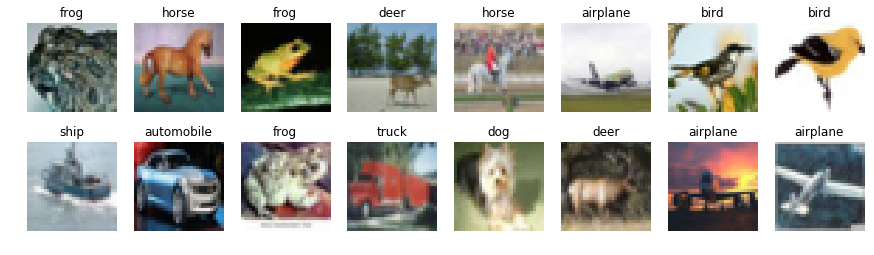

In [18]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

# Prepare data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

We need to convert class labels to one-hot encoded vectors. Use __keras.utils.to_categorical__.

In [19]:
# normalize inputs
x_train2 = x_train/255 - 0.5
x_test2 = x_test/255 - 0.5

# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Define CNN architecture

In [20]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

You need to define a model which takes __(None, 32, 32, 3)__ input and predicts __(None, 10)__ output with probabilities for all classes. __None__ in shapes stands for batch dimension.

Simple feed-forward networks in Keras can be defined in the following way:

```python
model = Sequential()  # start feed-forward model definition
model.add(Conv2D(..., input_shape=(32, 32, 3)))  # first layer needs to define "input_shape"

...  # here comes a bunch of convolutional, pooling and dropout layers

model.add(Dense(NUM_CLASSES))  # the last layer with neuron for each class
model.add(Activation("softmax"))  # output probabilities
```

Stack __4__ convolutional layers with kernel size __(3, 3)__ with growing number of filters __(16, 32, 32, 64)__, use "same" padding.

Add __2x2__ pooling layer after every 2 convolutional layers (conv-conv-pool scheme).

Use __LeakyReLU__ activation with recommended parameter __0.1__ for all layers that need it (after convolutional and dense layers):
```python
model.add(LeakyReLU(0.1))
```

Add a dense layer with __256__ neurons and a second dense layer with __10__ neurons for classes. Remember to use __Flatten__ layer before first dense layer to reshape input volume into a flat vector!

Add __Dropout__ after every pooling layer (__0.25__) and between dense layers (__0.5__).

In [21]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=[32, 32, 3]))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=32, kernel_size=3, padding="same"))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=32, kernel_size=3, padding="same"))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=64, kernel_size=3, padding="same"))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(padding="same"))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(rate=0.5))
    model.add(Dense(NUM_CLASSES))
    model.add(Activation(activation="softmax"))
    
    return model

In [22]:
# describe model
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [27]:
## GRADED PART, DO NOT CHANGE!
# Number of model parameters
grader.set_answer("7W4tu", grading_utils.model_total_params(model))

In [28]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


# Train model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [29]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

s = reset_tf_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

Training takes approximately **1.5 hours**. You're aiming for ~0.80 validation accuracy.

In [30]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
# from keras.models import load_model
# s = reset_tf_session()
# last_finished_epoch = 7
# model = load_model(model_filename.format(last_finished_epoch))

In [31]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               keras_utils.TqdmProgressCallback(),
               keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
)

Learning rate: 0.005

Epoch 1/10



Model saved in cifar.000.hdf5


Learning rate: 0.0045

Epoch 2/10



Model saved in cifar.001.hdf5
Learning rate: 0.00405

Epoch 3/10



Model saved in cifar.002.hdf5
Learning rate: 0.003645

Epoch 4/10



Model saved in cifar.003.hdf5
Learning rate: 0.0032805

Epoch 5/10



Model saved in cifar.004.hdf5
Learning rate: 0.00295245

Epoch 6/10



Model saved in cifar.005.hdf5
Learning rate: 0.002657205

Epoch 7/10



Model saved in cifar.006.hdf5
Learning rate: 0.0023914846

Epoch 8/10



Model saved in cifar.007.hdf5
Learning rate: 0.002152336

Epoch 9/10



Model saved in cifar.008.hdf5
Learning rate: 0.0019371024

Epoch 10/10



Model saved in cifar.009.hdf5


In [32]:
# save weights to file
model.save_weights("weights.h5")

In [33]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

# Evaluate model

In [35]:
# make test predictions
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

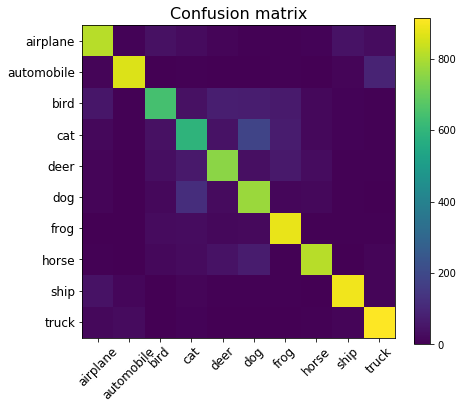

Test accuracy: 0.7959


In [37]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

In [38]:
## GRADED PART, DO NOT CHANGE!
# Accuracy on validation data
grader.set_answer("nQOsg", accuracy_score(y_test, y_pred_test_classes))

In [41]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


/Users/arpitjain/GitHub/Coursera-Advanced-Machine-Learning-Specialization/Introduction to Deep Learning/Playground/PythonEnv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


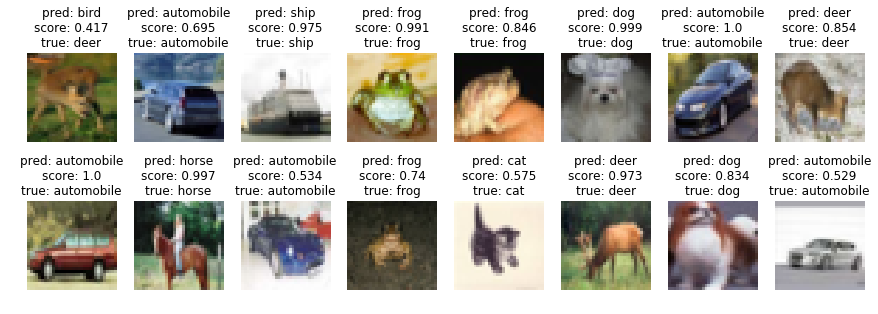

In [42]:
# inspect predictions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

# Visualize maximum stimuli

We want to find input images that provide maximum activations for particular layers of our network. 

We will find those maximum stimuli via gradient ascent in image space.

For that task we load our model weights, calculate the layer output gradient with respect to image input and shift input image in that direction.

In [43]:
s = reset_tf_session()  # clear default graph
K.set_learning_phase(0)  # disable dropout
model = make_model()
model.load_weights("weights.h5")  # that were saved after model.fit

In [44]:
# all weights we have
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [45]:
def find_maximum_stimuli(layer_name, is_conv, filter_index, model, iterations=20, step=1., verbose=True):
    
    def image_values_to_rgb(x):
        # normalize x: center on 0 (np.mean(x_train2)), ensure std is 0.25 (np.std(x_train2))
        # so that it looks like a normalized image input for our network
        x = (x - np.mean(x_train2))/np.std(x_train2)

        # do reverse normalization to RGB values: x = (x_norm + 0.5) * 255
        x = (x + 0.5 ) * 255
    
        # clip values to [0, 255] and convert to bytes
        x = np.clip(x, 0, 255).astype('uint8')
        return x

    # this is the placeholder for the input image
    input_img = model.input
    img_width, img_height = input_img.shape.as_list()[1:3]
    
    # find the layer output by name
    layer_output = list(filter(lambda x: x.name == layer_name, model.layers))[0].output

    # we build a loss function that maximizes the activation
    # of the filter_index filter of the layer considered
    if is_conv:
        # mean over feature map values for convolutional layer
        loss = K.mean(layer_output[:, :, :, filter_index])
    else:
        loss = K.mean(layer_output[:, filter_index])

    # we compute the gradient of the loss wrt input image
    grads = K.gradients(loss, input_img)[0]  # [0] because of the batch dimension!

    # normalization trick: we normalize the gradient
    grads = grads / (K.sqrt(K.sum(K.square(grads))) + 1e-10)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # we start from a gray image with some random noise
    input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * (0.1 if is_conv else 0.001)

    # we run gradient ascent
    for i in range(iterations):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        if verbose:
            print('Current loss value:', loss_value)

    # decode the resulting input image
    img = image_values_to_rgb(input_img_data[0])
    
    return img, loss_value

In [46]:
# sample maximum stimuli
def plot_filters_stimuli(layer_name, is_conv, model, iterations=20, step=1., verbose=False):
    cols = 8
    rows = 2
    filter_index = 0
    max_filter_index = list(filter(lambda x: x.name == layer_name, model.layers))[0].output.shape.as_list()[-1] - 1
    fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
    for i in range(cols):
        for j in range(rows):
            if filter_index <= max_filter_index:
                ax = fig.add_subplot(rows, cols, i * rows + j + 1)
                ax.grid('off')
                ax.axis('off')
                loss = -1e20
                while loss < 0 and filter_index <= max_filter_index:
                    stimuli, loss = find_maximum_stimuli(layer_name, is_conv, filter_index, model,
                                                         iterations, step, verbose=verbose)
                    filter_index += 1
                if loss > 0:
                    ax.imshow(stimuli)
                    ax.set_title("Filter #{}".format(filter_index))
    plt.show()

In [49]:
# maximum stimuli for convolutional neurons
conv_activation_layers = []
for layer in model.layers:
    if isinstance(layer, LeakyReLU):
        prev_layer = layer.input[0]
        if isinstance(prev_layer, Conv2D):
            conv_activation_layers.append(layer)

for layer in conv_activation_layers:
    print(layer.name)
    plot_filters_stimuli(layer_name=layer.name, is_conv=True, model=model)

/Users/arpitjain/GitHub/Coursera-Advanced-Machine-Learning-Specialization/Introduction to Deep Learning/Playground/PythonEnv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


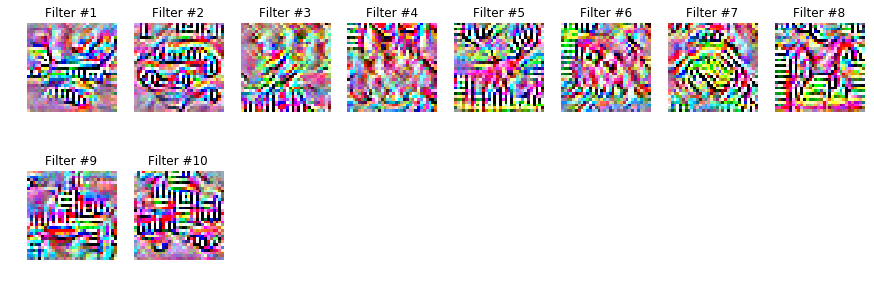

In [ ]:
# maximum stimuli for last dense layer
last_dense_layer = list(filter(lambda x: isinstance(x, Dense), model.layers))[-1]
plot_filters_stimuli(layer_name=last_dense_layer.name, is_conv=False, 
                     iterations=2000, step=0.1, model=model)

In [51]:
def maximum_stimuli_test_for_grader():
    layer = list(filter(lambda x: isinstance(x, Dense), model.layers))[-1]
    output_index = 7
    stimuli, loss = find_maximum_stimuli(
        layer_name=layer.name, 
        is_conv=False, 
        filter_index=output_index,
        model=model,
        verbose=False
    )
    return model.predict_proba(stimuli[np.newaxis, :])[0, output_index]

In [52]:
## GRADED PART, DO NOT CHANGE!
# Maximum stimuli test
grader.set_answer("96eco", maximum_stimuli_test_for_grader())

In [53]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


That's it! Congratulations!

What you've done:
- defined CNN architecture
- trained your model
- evaluated your model
- visualised learnt filters